(42000, 784)
(42000,)


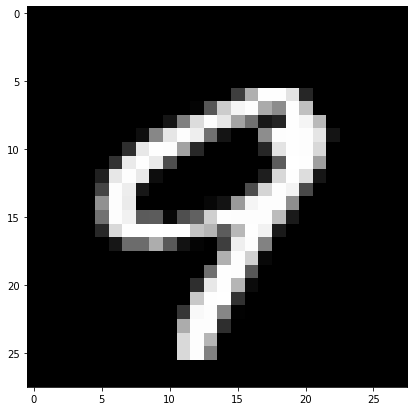

9
(15000, 784)
   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


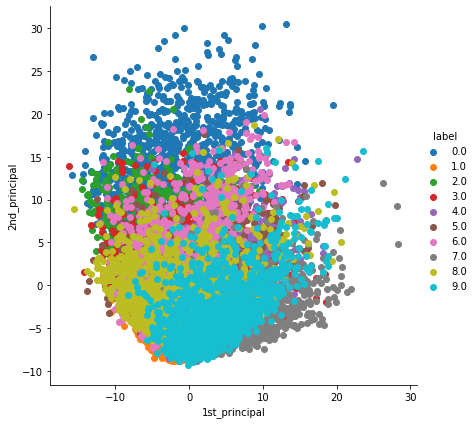

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d0=pd.read_csv("mnist_train.csv")
d0.head(5)
l=d0['label']
d=d0.drop("label",axis=1)
print(d.shape)
print(l.shape)
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,cmap="gray",interpolation="none")
plt.show()
print(l[idx])
labels=l.head(15000)
data=d.head(15000)
from sklearn.preprocessing import StandardScaler
Standardized_data=StandardScaler().fit_transform(data)
print(Standardized_data.shape)
sample_data=Standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
covar_matrix.shape
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
vectors=vectors.T
new_coordinates=np.matmul(vectors,sample_data.T)
new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
import seaborn as sns
sns.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [33]:
from sklearn import decomposition

In [34]:
pca=decomposition.PCA()

In [35]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

In [36]:
print(pca_data.shape)

(15000, 2)


In [37]:
pca_data=np.vstack((pca_data.T,labels)).T

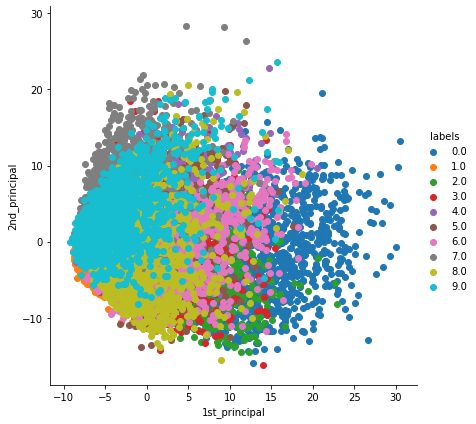

In [39]:
pca_df=pd.DataFrame(data=pca_data,columns=["1st_principal","2nd_principal","labels"])
sns.FacetGrid(pca_df,hue="labels",height=6)\
    .map(plt.scatter,"1st_principal","2nd_principal")\
    .add_legend()
plt.show()

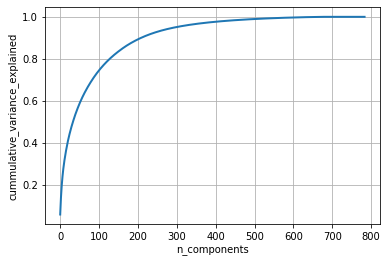

In [42]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cummulative_variance_explained')
plt.show()